Вот обновленная версия кода, который обрабатывает три класса вместо двух в задаче XOR:

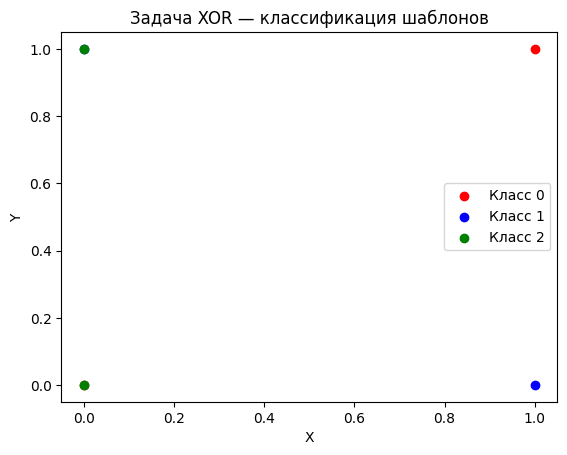

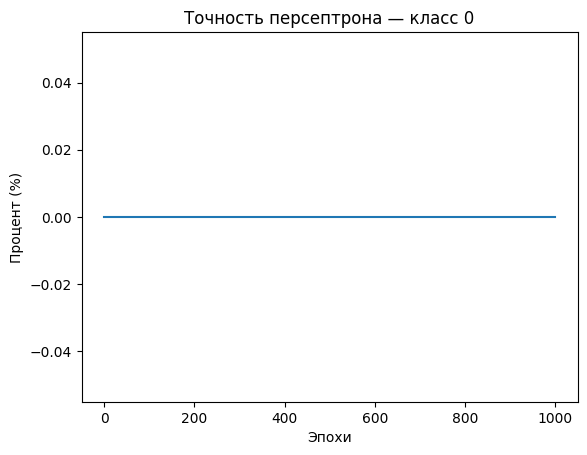

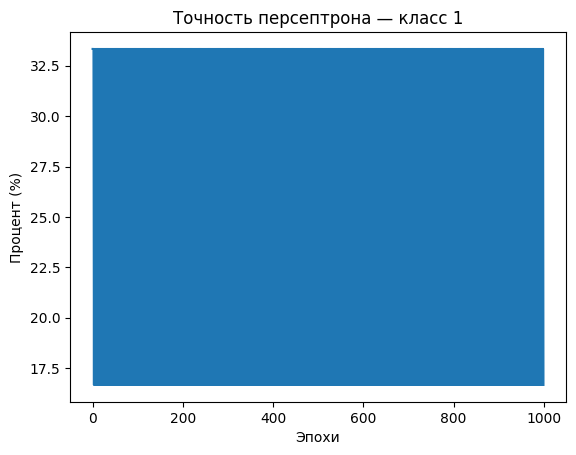

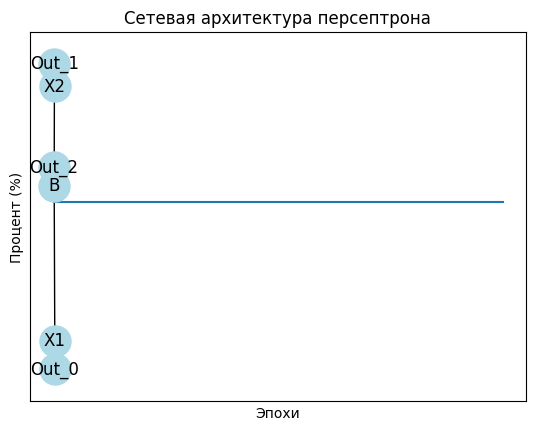

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Класс персептрона
class Perceptron:
    def __init__(self, input_size):
        self.weights = np.random.rand(input_size + 1)

    def activate(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        inputs = np.append(inputs, 1)  # add bias
        summation = np.dot(inputs, self.weights)
        return self.activate(summation)

    def train(self, training_inputs, labels, epochs, learning_rate):
        accuracy = np.zeros((epochs, len(np.unique(labels))))
        for epoch in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                if prediction == label:
                    accuracy[epoch, int(label)] += 1
                self.weights += learning_rate * (label - prediction) * np.append(inputs, 1)

        return (accuracy / len(labels)) * 100

# Пример задачи XOR с тремя классами
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1], [0, 1], [0, 0]])
labels = np.array([0, 1, 1, 0, 2, 2])

# Создать и обучить персептрон
perceptron = Perceptron(input_size=2)
epochs = 1000
learning_rate = 0.1
accuracy = perceptron.train(training_inputs, labels, epochs, learning_rate)

# Создание точек данных для трех классов
x_class0 = []
y_class0 = []
x_class1 = []
y_class1 = []
x_class2 = []
y_class2 = []

for i in range(len(training_inputs)):
    if labels[i] == 0:
        x_class0.append(training_inputs[i][0])
        y_class0.append(training_inputs[i][1])
    elif labels[i] == 1:
        x_class1.append(training_inputs[i][0])
        y_class1.append(training_inputs[i][1])
    else:
        x_class2.append(training_inputs[i][0])
        y_class2.append(training_inputs[i][1])

# Постройте три класса
plt.scatter(x_class0, y_class0, c='red', label='Класс 0')
plt.scatter(x_class1, y_class1, c='blue', label='Класс 1')
plt.scatter(x_class2, y_class2, c='green', label='Класс 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Задача XOR — классификация шаблонов')
plt.legend()

# Отображение процентных данных для каждого класса
for i, label in enumerate(np.unique(labels)):
    plt.figure()
    plt.plot(range(epochs), accuracy[:, i])
    plt.xlabel('Эпохи')
    plt.ylabel('Процент (%)')
    plt.title(f'Точность персептрона — класс {int(label)}')

# Показать диаграмму сетевой архитектуры
G = nx.DiGraph()
G.add_nodes_from(['X1', 'X2', 'B', 'Out_0', 'Out_1', 'Out_2'])
for i in range(2):
    G.add_edge(f'X{i+1}', f'Out_{i}')
G.add_edge('B', 'Out_0', weight=perceptron.weights[0])
G.add_edge('B', 'Out_1', weight=perceptron.weights[1])
G.add_edge('B', 'Out_2', weight=perceptron.weights[2])

pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'Веса')
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_labels(G, pos, font_color='black', font_size=12)
nx.draw_networkx_edges(G, pos, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')

plt.title('Сетевая архитектура персептрона')

# Показать графики
plt.show()
